In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from tqdm import tqdm_notebook
from citipy import citipy
from scipy.stats import linregress
import seaborn as sns
lat_range = (-90, 90)
lng_range = (-180, 180)
from weather_api import w_key

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

600

In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={w_key}&units={units}&q="

In [4]:
cities_df = pd.DataFrame(cities)
cities_df["City"] = cities_df[0]
del cities_df[0]
#cities_df

In [5]:
cities_df['Latitude'] = ""
cities_df['Max Temperature (F)'] = ""
cities_df['Humidity (%)'] = ""
cities_df['Cloudiness (%)'] = ""
cities_df['Wind Speed (mph)'] = ""
cities_df['Date'] = ""
cities_df['Country'] = ""
#cities_df.head()

In [6]:
for index, row in tqdm_notebook(list(cities_df.iterrows())):

    city = row[0]

    print(f"Processing City {index} | {city}")
    response = requests.get(query_url + city).json()
    
    try:
        cities_df.loc[index, 'Latitude'] = response["coord"]['lat']
        cities_df.loc[index, 'Max Temperature (F)'] = response['main']['temp_max']
        cities_df.loc[index, 'Humidity (%)'] = response['main']['humidity']
        cities_df.loc[index, 'Cloudiness (%)'] = response['clouds']['all']
        cities_df.loc[index, 'Wind Speed (mph)'] = response['wind']['speed']
        cities_df.loc[index, 'Date'] = response['dt']
        cities_df.loc[index, 'Country'] = response['sys']['country']
    except (KeyError, IndexError):
        print("City not Found  ... skipping.")
        
    print("------------")

Processing City 0 | kaitangata
------------
Processing City 1 | cape town
------------
Processing City 2 | mount isa
------------
Processing City 3 | yulara
------------
Processing City 4 | hamilton
------------
Processing City 5 | thompson
------------
Processing City 6 | tasiilaq
------------
Processing City 7 | ushuaia
------------
Processing City 8 | warri
------------
Processing City 9 | jishou
------------
Processing City 10 | touros
------------
Processing City 11 | rikitea
------------
Processing City 12 | severnoye
------------
Processing City 13 | albany
------------
Processing City 14 | pevek
------------
Processing City 15 | castro
------------
Processing City 16 | gisborne
------------
Processing City 17 | arraial do cabo
------------
Processing City 18 | upernavik
------------
Processing City 19 | dikson
------------
Processing City 20 | maiduguri
------------
Processing City 21 | khatanga
------------
Processing City 22 | tripoli
------------
Processing City 23 | naze
--

Processing City 173 | tommot
------------
Processing City 174 | isangel
------------
Processing City 175 | egvekinot
------------
Processing City 176 | patacamaya
------------
Processing City 177 | barcelona
------------
Processing City 178 | mundo nuevo
------------
Processing City 179 | tecolutla
------------
Processing City 180 | rio gallegos
------------
Processing City 181 | shelbyville
------------
Processing City 182 | sulangan
------------
Processing City 183 | suntar
------------
Processing City 184 | kysyl-syr
------------
Processing City 185 | dongling
------------
Processing City 186 | kazalinsk
City not Found  ... skipping.
------------
Processing City 187 | victoria
------------
Processing City 188 | soyo
------------
Processing City 189 | baruun-urt
------------
Processing City 190 | iqaluit
------------
Processing City 191 | margate
------------
Processing City 192 | barentsburg
City not Found  ... skipping.
------------
Processing City 193 | khilok
------------
Process

City not Found  ... skipping.
------------
Processing City 349 | prince rupert
------------
Processing City 350 | huaraz
------------
Processing City 351 | sibiti
------------
Processing City 352 | ongandjera
------------
Processing City 353 | pereslavl-zalesskiy
------------
Processing City 354 | chikoy
City not Found  ... skipping.
------------
Processing City 355 | eganville
------------
Processing City 356 | truth or consequences
------------
Processing City 357 | grojec
------------
Processing City 358 | avera
------------
Processing City 359 | uwayl
City not Found  ... skipping.
------------
Processing City 360 | dhidhdhoo
------------
Processing City 361 | abha
------------
Processing City 362 | dingle
------------
Processing City 363 | san patricio
------------
Processing City 364 | sao filipe
------------
Processing City 365 | codajas
------------
Processing City 366 | alta floresta
------------
Processing City 367 | genhe
------------
Processing City 368 | nis
------------
Pr

Processing City 521 | smithers
------------
Processing City 522 | ipixuna
------------
Processing City 523 | mouzakion
City not Found  ... skipping.
------------
Processing City 524 | hami
------------
Processing City 525 | aljezur
------------
Processing City 526 | iberia
------------
Processing City 527 | flin flon
------------
Processing City 528 | colares
------------
Processing City 529 | mariental
------------
Processing City 530 | muscle shoals
------------
Processing City 531 | katsiveli
City not Found  ... skipping.
------------
Processing City 532 | wilmington
------------
Processing City 533 | yar-sale
------------
Processing City 534 | araioses
------------
Processing City 535 | udachnyy
------------
Processing City 536 | tayoltita
------------
Processing City 537 | kalemie
------------
Processing City 538 | goderich
------------
Processing City 539 | mirnyy
------------
Processing City 540 | altamont
------------
Processing City 541 | cururupu
------------
Processing City 

In [7]:
cities_df.replace('', np.nan, inplace=True)
cities_df = cities_df.dropna(how='any')

In [8]:
cities_df.count()

City                   539
Latitude               539
Max Temperature (F)    539
Humidity (%)           539
Cloudiness (%)         539
Wind Speed (mph)       539
Date                   539
Country                539
dtype: int64

In [9]:
cities_df.head()

,City,Latitude,Max Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Date,Country
0,kaitangata,-46.28,48.99,61.0,65.0,3.00,1.563407e+09,NZ
1,cape town,-33.93,59.00,82.0,75.0,19.46,1.563407e+09,ZA
2,mount isa,-20.73,62.60,29.0,0.0,9.17,1.563407e+09,AU
3,yulara,-25.24,46.40,65.0,0.0,6.93,1.563407e+09,AU
4,hamilton,43.26,82.00,74.0,20.0,9.17,1.563407e+09,CA


In [10]:
cities_df.to_csv("cities.csv", index=True, header=True)

1.8719984907019416

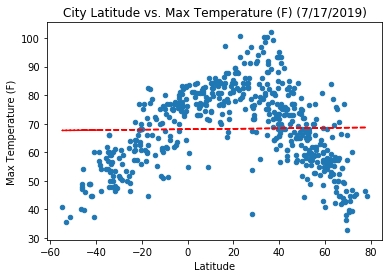

In [11]:
(slope, intercept, r_value, _, _) = linregress(cities_df["Latitude"], cities_df["Max Temperature (F)"])
fit = slope * cities_df["Latitude"] + intercept

cities_df.plot.scatter(x="Latitude", y="Max Temperature (F)")
plt.plot(cities_df["Latitude"], fit, 'r--')
plt.title("City Latitude vs. Max Temperature (F) (7/17/2019)")
plt.savefig("Images/Temp.png")

(r_value * 100)

5.653304341056431

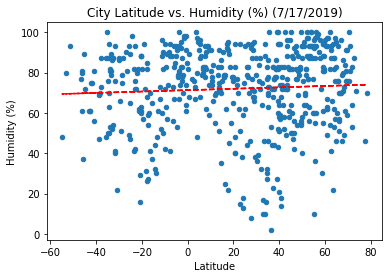

In [12]:
(slope, intercept, r_value, _, _) = linregress(cities_df["Latitude"], cities_df["Humidity (%)"])
fit = slope * cities_df["Latitude"] + intercept


cities_df.plot.scatter(x="Latitude", y="Humidity (%)")
plt.plot(cities_df["Latitude"], fit, 'r--')
plt.title("City Latitude vs. Humidity (%) (7/17/2019)")
plt.savefig("Images/Humid.png")

(r_value * 100)

14.7866669376783

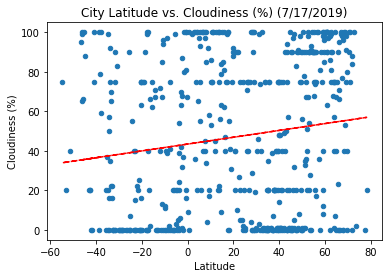

In [13]:
(slope, intercept, r_value, _, _) = linregress(cities_df["Latitude"], cities_df["Cloudiness (%)"])
fit = slope * cities_df["Latitude"] + intercept

cities_df.plot.scatter(x="Latitude", y="Cloudiness (%)")
plt.plot(cities_df["Latitude"], fit, 'r--')
plt.title("City Latitude vs. Cloudiness (%) (7/17/2019)")
plt.savefig("Images/Cloud.png")

(r_value * 100)

-3.799288362854045

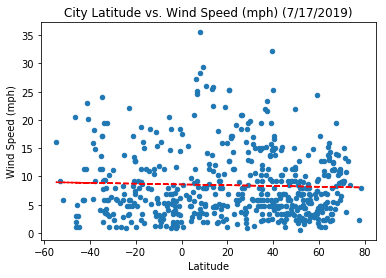

In [14]:
(slope, intercept, r_value, _, _) = linregress(cities_df["Latitude"], cities_df["Wind Speed (mph)"])
fit = slope * cities_df["Latitude"] + intercept


cities_df.plot.scatter(x="Latitude", y="Wind Speed (mph)")
plt.plot(cities_df["Latitude"], fit, 'r--')
plt.title("City Latitude vs. Wind Speed (mph) (7/17/2019)")
plt.savefig("Images/wind.png")

(r_value * 100)

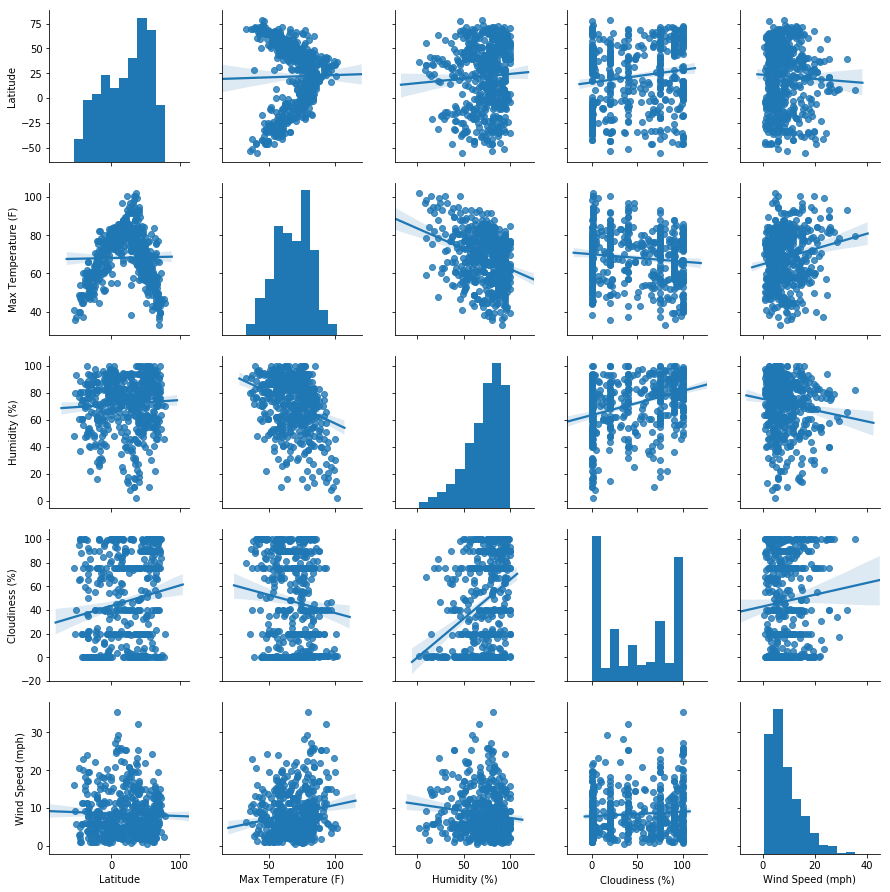

In [15]:
cities_df_numeric = cities_df[['Latitude', 'Max Temperature (F)', 'Humidity (%)', 'Cloudiness (%)', 'Wind Speed (mph)']]
sns.pairplot(cities_df_numeric, kind="reg")
#For Fun

In [16]:
#broadly, latitude is a poor measure of any of the vairance outside of temp, and it should be normalized to zero for the 
#regression to have any meaning (too lazy to fix it)
#The cloudiness measure is trash, although I would be interested to see how the data is recorded and measured
#Humidity tends to trend towards 100%, and I imagine a geographic map would show that most cities recorded are either near an ocean
#or other body of water, which could've been assumed without any analysis but it is nice to see the data broadly backs that up. 